


............................................. # Part 0 Load packages, load data


In [ ]:
#import neccessary libraries
import numpy as np
import pandas as pd
import sklearn as sl
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TVdata.csv to TVdata (4).csv


In [ ]:
TV = pd.read_csv('TVdata.csv')
TV.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.6056,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.710000
1,300175,270338.4264,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.5,94.983250,41,no award,R,3.250000
2,361899,256165.8674,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.3,115.763675,58,other award,R,2.646667
3,308314,196622.7210,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.6,130.703583,94,Oscar,R,1.666667
4,307201,159841.6521,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.4,105.545533,37,other award,R,3.066667


# Part 1: Data Exploration

## 1.1 Understand features

In [ ]:
# check data info
TV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   import_id                      4226 non-null   object 
 5   release_year                   4226 non-null   int64  
 6   genres                         4226 non-null   object 
 7   imdb_votes                     4226 non-null   int64  
 8   budget                         4226 non-null   int64  
 9   boxoffice                      4226 non-null   int64  
 10  imdb_rating                    4226 non-null   float64
 11  duration_in_mins               4226 non-null   float64
 12  metacritic_score               4226 non-null   i

In [ ]:
# check the unique values for each column
TV.nunique()

video_id                         4226
cvt_per_day                      4226
weighted_categorical_position      37
weighted_horizontal_poition        68
import_id                           4
release_year                       97
genres                           1165
imdb_votes                       2282
budget                            253
boxoffice                         410
imdb_rating                        85
duration_in_mins                 4097
metacritic_score                   90
awards                              5
mpaa                                6
star_category                     569
dtype: int64

In [ ]:
TV.awards.unique()

array(['other award', 'no award', 'Oscar', 'Golden Globe', 'BAFTA'],
      dtype=object)

In [ ]:
# check missing values
TV.isnull().sum().sort_values(ascending = False).head(10)

star_category       0
mpaa                0
awards              0
metacritic_score    0
duration_in_mins    0
imdb_rating         0
boxoffice           0
budget              0
imdb_votes          0
genres              0
dtype: int64

In [ ]:
# understand numerical feature
TV.describe()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000,4226.000000,4226.000000
mean,280371.162565,4218.630239,7.782537,28.103644,2001.056791,6462.924042,2.150743e+06,2.536338e+06,5.257099,89.556123,15.973734,0.954651
std,112640.127822,13036.079963,6.134183,11.863649,17.496849,31596.006790,7.176604e+06,8.243516e+06,2.122810,21.086183,26.205217,0.955045
min,7909.000000,2.187625,1.000000,1.000000,1916.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,4.037250,0.000000,0.000000
25%,285104.250000,351.168776,4.000000,20.000000,1998.000000,81.000000,0.000000e+00,0.000000e+00,4.300000,82.601712,0.000000,0.000000
50%,313891.500000,1193.499988,6.000000,28.000000,2008.000000,535.000000,0.000000e+00,0.000000e+00,5.800000,90.730308,0.000000,1.000000
75%,349345.750000,3356.788816,9.000000,36.000000,2012.000000,3053.000000,1.500000e+06,0.000000e+00,6.800000,99.500312,41.000000,1.666667
max,394880.000000,307127.605600,41.000000,70.000000,2017.000000,948630.000000,1.070000e+08,1.842088e+08,10.000000,246.016767,100.000000,4.000000


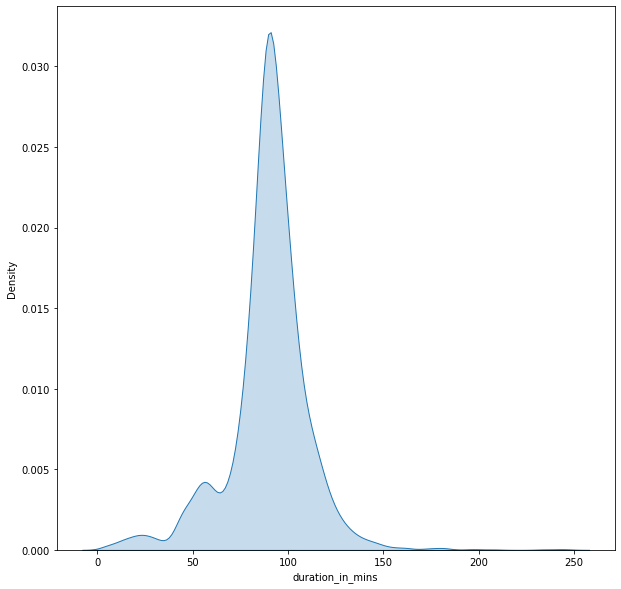

In [ ]:
plt.figure(figsize = (10,10))
sns.kdeplot(data=TV['duration_in_mins'], shade=True)
plt.show()

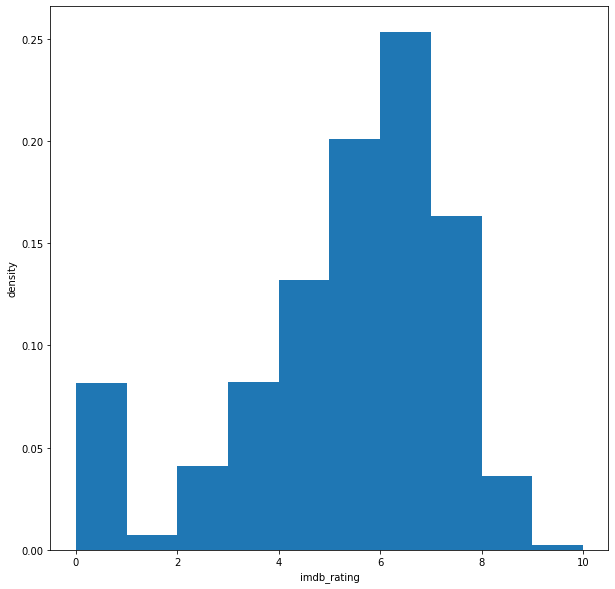

In [ ]:
data.skew(0)

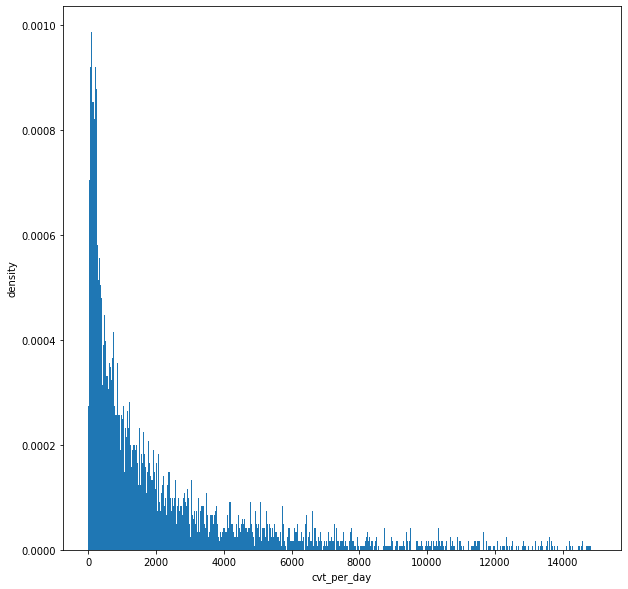

In [ ]:
plt.figure(figsize = (10,10))
plt.hist(TV['cvt_per_day'],bins=range(0,15000,30),density=True)
plt.xlabel('cvt_per_day')
plt.ylabel('density')
plt.show()

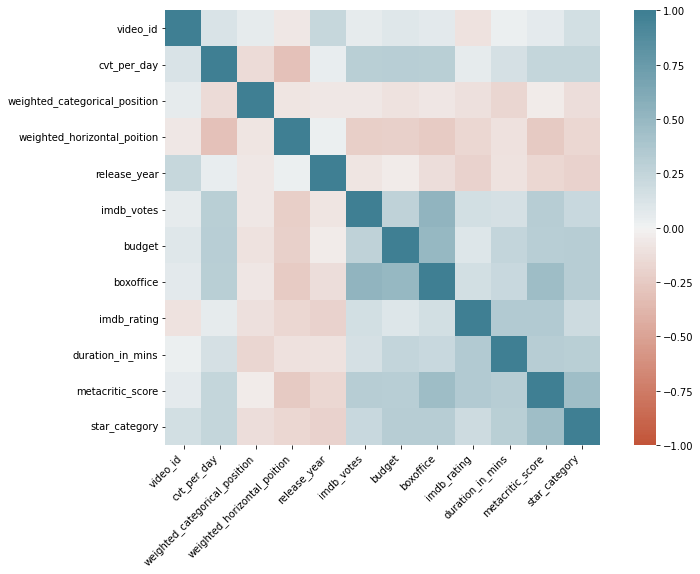

In [ ]:
# correlations between features
corr = TV.corr()
# show heapmap of correlations
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.gcf().set_size_inches(plt.gcf().get_size_inches()[0]*2, plt.gcf().get_size_inches()[1]*2, forward=True) 

In [ ]:
corr

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
video_id,1.000000,0.122352,0.050145,-0.067163,0.231145,0.047766,0.088285,0.071539,-0.099815,0.023838,0.063930,0.170079
cvt_per_day,0.122352,1.000000,-0.148000,-0.301663,0.045859,0.297697,0.315886,0.312209,0.058894,0.152217,0.249159,0.246956
weighted_categorical_position,0.050145,-0.148000,1.000000,-0.084066,-0.068902,-0.063700,-0.089899,-0.073628,-0.116443,-0.174461,-0.044317,-0.122851
weighted_horizontal_poition,-0.067163,-0.301663,-0.084066,1.000000,0.026634,-0.220749,-0.211356,-0.244709,-0.162021,-0.102344,-0.255015,-0.167801
release_year,0.231145,0.045859,-0.068902,0.026634,1.000000,-0.082661,-0.040121,-0.128091,-0.198856,-0.096811,-0.167038,-0.198454
imdb_votes,0.047766,0.297697,-0.063700,-0.220749,-0.082661,1.000000,0.272852,0.531467,0.163264,0.155670,0.321860,0.225192
budget,0.088285,0.315886,-0.089899,-0.211356,-0.040121,0.272852,1.000000,0.504618,0.105671,0.251342,0.314608,0.321721
boxoffice,0.071539,0.312209,-0.073628,-0.244709,-0.128091,0.531467,0.504618,1.000000,0.163673,0.226184,0.464965,0.322329
imdb_rating,-0.099815,0.058894,-0.116443,-0.162021,-0.198856,0.163264,0.105671,0.163673,1.000000,0.344055,0.346935,0.191768
duration_in_mins,0.023838,0.152217,-0.174461,-0.102344,-0.096811,0.155670,0.251342,0.226184,0.344055,1.000000,0.327050,0.309110


## 1.3 Understand categorical features

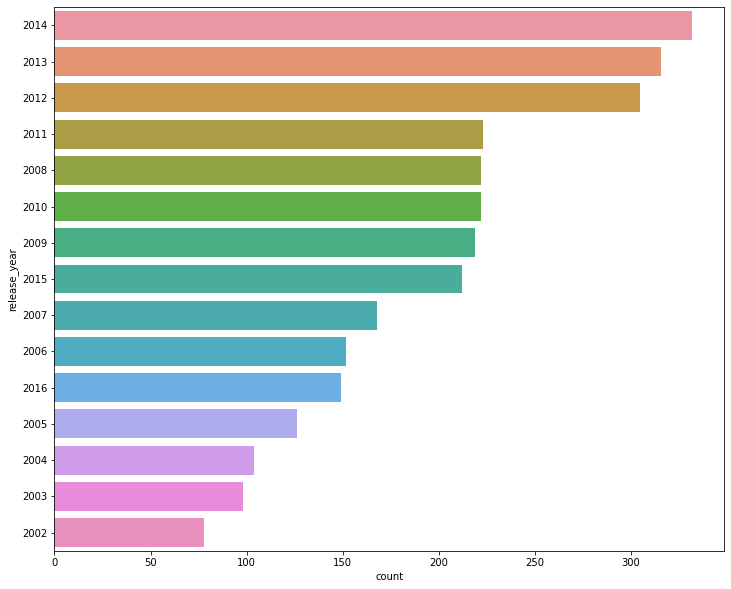

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(y="release_year", data=TV, order=TV['release_year'].value_counts().index[0:15])
plt.show()

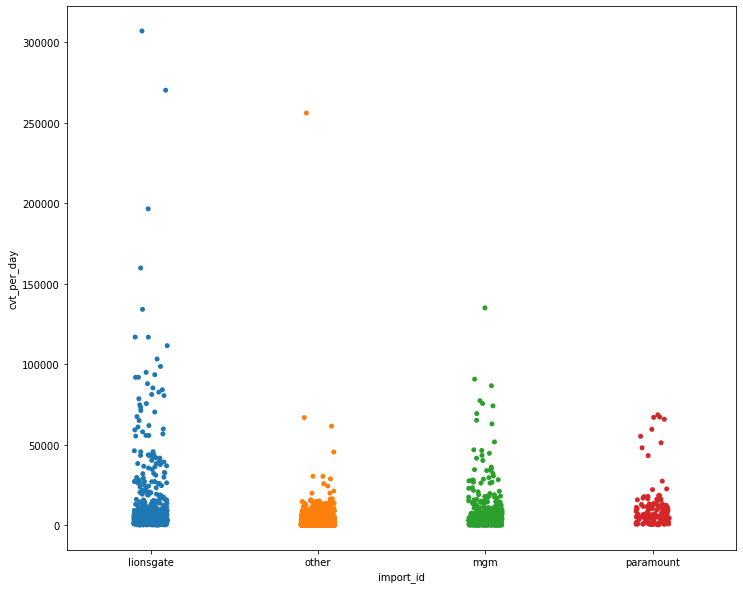

In [ ]:
plt.figure(figsize=(12,10))
sns.stripplot(x='import_id', y='cvt_per_day', data=TV)
plt.show()

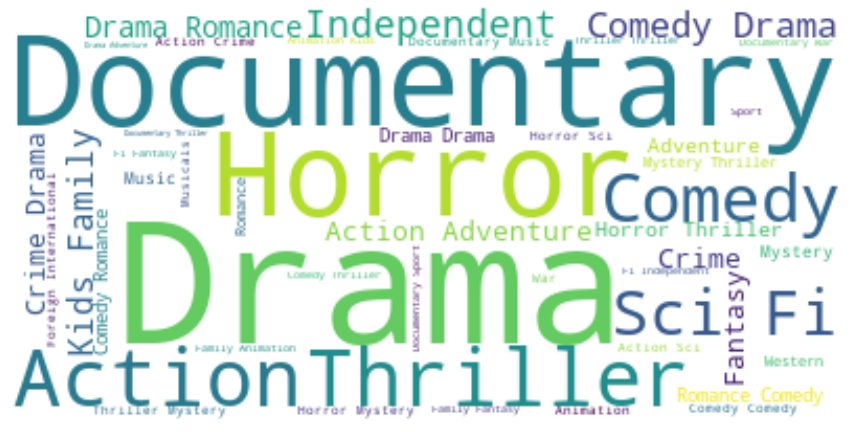

In [ ]:
text_0 = " ".join(genre for genre in TV.loc[:,'genres'])

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text_0)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import plotly.express as px
top_rated=TV.sort_values(by='imdb_rating', ascending=False)[0:50]
fig =px.sunburst(
    top_rated,
    path=['awards'],
    values='imdb_rating',
    color='imdb_rating')
fig.show()

In [ ]:
top_clicked=TV.sort_values(by='cvt_per_day', ascending=False)[0:50]
fig =px.sunburst(
    top_rated,
    path=['mpaa'],
    values='cvt_per_day',
    color='cvt_per_day')
fig.show()

# Part 2: Feature Preprocessing

## 2.1 Categorical features

In [ ]:
# Convert categorical variables into dummy variables
TV_new = pd.get_dummies(TV, columns=['import_id','mpaa','awards'])
TV_new.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,import_id_lionsgate,import_id_mgm,import_id_other,import_id_paramount,mpaa_G,mpaa_NC-17,mpaa_NotRated,mpaa_PG,mpaa_PG-13,mpaa_R,awards_BAFTA,awards_Golden Globe,awards_Oscar,awards_no award,awards_other award
0,385504,307127.6056,1,3,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.5,112.301017,51,1.710000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,300175,270338.4264,1,3,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.5,94.983250,41,3.250000,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,361899,256165.8674,1,3,2012,"Crime,Drama",197596,26000000,37397291,7.3,115.763675,58,2.646667,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,308314,196622.7210,3,4,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.6,130.703583,94,1.666667,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,307201,159841.6521,1,3,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.4,105.545533,37,3.066667,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
# Convert 'genres' into dummy variables
d_genres=TV['genres'].str.get_dummies(sep=',').astype(np.int64)
d_genres['Misc_genres']=d_genres['Anime']|d_genres['Reality']|d_genres['Lifestyle']|d_genres['Adult']|d_genres['LGBT']|d_genres['Holiday']
d_genres.drop(['Anime', 'Reality','Lifestyle', 'Adult','LGBT','Holiday'], inplace=True, axis=1)

In [ ]:
TV['release_year'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

0.1    1974.0
0.2    1991.0
0.3    2001.0
0.4    2006.0
0.5    2008.0
0.6    2010.0
0.7    2012.0
0.8    2013.0
0.9    2014.0
Name: release_year, dtype: float64

In [ ]:
# bin release_year and convert into dummies
bin_year = [1916, 1974, 1991, 2001, 2006, 2008, 2010, 2012, 2013, 2014, 2017]
year_range = ['1916-1974', '1974-1991', '1991-2001', '2001-2006','2006-2008','2008-2010','2010-2012','2012-2013',
              '2013-2014','2014-2017']
year_bin = pd.cut(TV['release_year'], bin_year, labels=year_range)
d_year = pd.get_dummies(year_bin)

In [ ]:
# new dataframe

TV_new.drop(['release_year', 'genres'], axis=1, inplace=True)

TV_new = pd.concat([TV_new, d_genres, d_year], axis=1)
TV_new.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,import_id_lionsgate,import_id_mgm,import_id_other,import_id_paramount,mpaa_G,mpaa_NC-17,mpaa_NotRated,mpaa_PG,mpaa_PG-13,mpaa_R,awards_BAFTA,awards_Golden Globe,awards_Oscar,awards_no award,awards_other award,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Misc_genres,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.6056,1,3,69614,15000000,42930462,6.5,112.301017,51,1.710000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,300175,270338.4264,1,3,46705,15000000,3301046,6.5,94.983250,41,3.250000,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,361899,256165.8674,1,3,197596,26000000,37397291,7.3,115.763675,58,2.646667,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,308314,196622.7210,3,4,356339,15000000,15700000,7.6,130.703583,94,1.666667,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,307201,159841.6521,1,3,46720,27220000,8551228,6.4,105.545533,37,3.066667,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


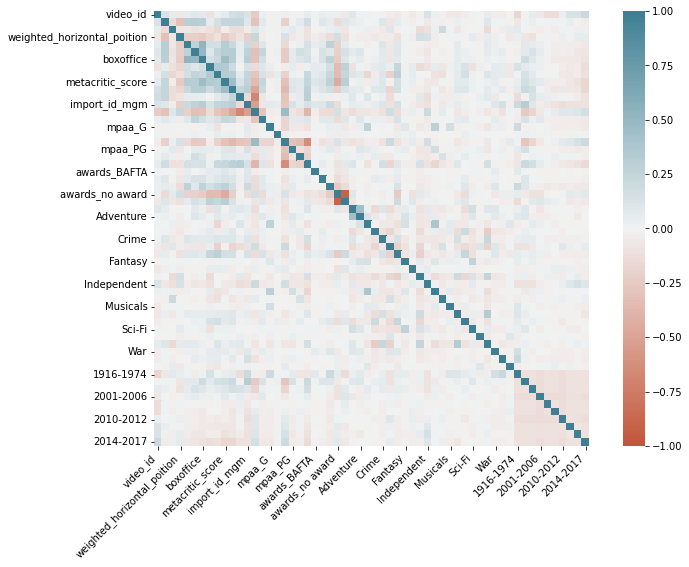

In [ ]:
# correlations between features
corr = TV_new.corr()
# show heapmap of correlations
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.gcf().set_size_inches(plt.gcf().get_size_inches()[0]*2, plt.gcf().get_size_inches()[1]*2, forward=True)

In [ ]:
corr

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,import_id_lionsgate,import_id_mgm,import_id_other,import_id_paramount,mpaa_G,mpaa_NC-17,mpaa_NotRated,mpaa_PG,mpaa_PG-13,mpaa_R,awards_BAFTA,awards_Golden Globe,awards_Oscar,awards_no award,awards_other award,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Misc_genres,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
video_id,1.000000,0.122352,0.050145,-0.067163,0.047766,0.088285,0.071539,-0.099815,0.023838,0.063930,0.170079,0.183154,0.118437,-0.240548,0.036647,-0.011308,0.013471,-0.046673,-0.011532,0.010089,0.055811,0.022267,0.040733,0.027875,0.032307,-0.055588,0.093012,0.021735,0.022652,-0.002015,0.022678,-0.037048,-0.055389,-0.016080,-0.049941,-0.010954,0.130198,0.027506,-0.013717,-0.050894,-0.062241,-0.033978,0.011687,-0.004849,0.059542,-0.037965,-0.032063,-0.002297,-0.183897,-0.005888,0.056001,-0.068959,-0.128733,-0.120635,0.032384,0.119991,0.134300,0.211512
cvt_per_day,0.122352,1.000000,-0.148000,-0.301663,0.297697,0.315886,0.312209,0.058894,0.152217,0.249159,0.246956,0.248420,0.100305,-0.299685,0.085073,-0.019921,0.022136,-0.208429,0.011727,0.073199,0.182615,-0.004067,0.087984,0.050941,-0.140946,0.107384,0.058726,0.027003,0.005501,0.021801,0.101685,-0.084587,0.047846,0.013088,-0.024398,0.004741,-0.059786,0.017858,-0.030738,-0.018141,0.038856,-0.013374,-0.013600,-0.004128,0.106174,0.013296,0.020877,-0.014793,-0.069148,0.022911,0.034073,0.000575,0.023077,0.012108,-0.004964,0.041592,-0.009783,-0.046406
weighted_categorical_position,0.050145,-0.148000,1.000000,-0.084066,-0.063700,-0.089899,-0.073628,-0.116443,-0.174461,-0.044317,-0.122851,-0.123672,-0.039119,0.109341,0.040745,0.018714,-0.018131,0.036141,0.071220,0.028402,-0.109437,0.006996,-0.019928,0.034300,0.067617,-0.079196,-0.007241,0.019130,0.031634,-0.025646,-0.058280,0.097743,-0.019029,0.005112,0.020508,-0.139118,-0.114314,0.028523,0.195244,0.023238,-0.064777,-0.018852,0.001644,0.007138,-0.150362,-0.017551,-0.038919,0.059687,0.074228,0.007347,-0.020516,-0.026400,-0.022553,-0.041404,0.013281,0.011986,-0.024348,0.028126
weighted_horizontal_poition,-0.067163,-0.301663,-0.084066,1.000000,-0.220749,-0.211356,-0.244709,-0.162021,-0.102344,-0.255015,-0.167801,-0.092465,-0.215711,0.232091,-0.034058,0.003184,-0.008276,0.134854,-0.060172,-0.026381,-0.096518,-0.034579,-0.068893,-0.122809,0.172824,-0.111613,0.002595,-0.032649,-0.038425,-0.050093,-0.041555,-0.033871,-0.104659,0.012323,-0.038978,0.166510,0.138283,-0.039861,0.001749,0.010456,0.013619,-0.013761,0.063670,-0.041013,0.066542,-0.029320,-0.002804,-0.051540,0.039564,-0.077813,-0.086042,-0.012600,0.012859,-0.021905,0.033982,0.015566,0.055725,0.049843
imdb_votes,0.047766,0.297697,-0.063700,-0.220749,1.000000,0.272852,0.531467,0.163264,0.155670,0.321860,0.225192,0.047803,0.201204,-0.210163,0.094179,-0.008849,0.016068,-0.153971,0.006416,0.030180,0.150219,0.047275,0.085756,0.271065,-0.189047,0.066842,-0.006242,0.007266,-0.025265,-0.012893,0.116749,-0.047820,0.088407,0.015310,-0.013195,-0.008456,-0.046526,-0.029644,-0.023150,-0.006141,0.063089,-0.001894,0.022317,-0.013225,0.072030,0.034886,-0.002521,-0.013341,0.020483,0.082841,0.047468,0.037113,-0.006118,-0.030206,-0.028515,-0.034573,-0.044308,-0.058275
budget,0.088285,0.315886,-0.089899,-0.211356,0.272852,1.000000,0.504618,0.105671,0.251342,0.314608,0.321721,0.051665,0.270586,-0.318896,0.244860,-0.011662,0.033145,-0.251782,0.052893,0.175966,0.132231,0.006763,0.132993,0.091551,-0.204202,0.145903,0.076814,0.105682,-0.000797,0.013633,0.085388,-0.066677,0.106952,0.004984,-0.008515,-0.041461,-0.077246,-0.000282,-0.026832,-0.021179,0.052834,0.038035,0.009029,-0.021631,0.062866,0.028309,0.049040,-0.021045,-0.039642,0.074179,0.121630,0

## 2.2 X and Y

In [ ]:
# Get feature space by dropping useless feature
to_drop = ['cvt_per_day','video_id']
X = TV_new.drop(to_drop, axis=1)
y = TV_new['cvt_per_day']

# Part 3: Model Training

## Part 3.1: Data Split and Feature Scaling

In [ ]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y, test_size = 0.15, random_state = 10)
print('training data has ' + str(X_train.shape[0]) + ' observations with ' + str(X_train.shape[1]) +' features')
print('testing data has ' + str(X_test.shape[0]) + ' observations with ' + str(X_test.shape[1]) + ' features ')

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

training data has 3592 observations with 56 features
testing data has 634 observations with 56 features 


## Part 3.2: Model Selection

### 3.2.1 Baseline linear regression

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

regressor = LinearRegression()
regressor.fit(X_train, y_train)

coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",regressor.coef_.transpose())

coef_table.head(9)

,0,Coefs
0,weighted_categorical_position,-1227.041574
1,weighted_horizontal_poition,-2719.731789
2,imdb_votes,2228.664141
3,budget,1720.174344
4,boxoffice,1223.147189
5,imdb_rating,-761.210310
6,duration_in_mins,282.824420
7,metacritic_score,452.852403
8,star_category,547.169676


In [ ]:
X_train.shape

(3592, 56)

In [ ]:
import statsmodels.api as sm

# linear regression 
x = sm.add_constant(X_train)
y = list(y_train)
lr = sm.OLS(y, x).fit()
lr.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     28.78
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.13e-232
Time:                        18:08:23   Log-Likelihood:                -38410.
No. Observations:                3592   AIC:                         7.693e+04
Df Residuals:                    3538   BIC:                         7.726e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          4210.0586    179.212     23.492      0.000    3858.689    4561.428
weighted_categorical_position -1222.9335    196.186     -6.234      0.000   -1607.582    -838.285
weighted_horizontal_poition   -2719.5701    199.809    -13.611      0.000   -3111.322   -2327.818
imdb_votes                     2227.4481    214.778     10.371      0.000    1806.346    2648.550
budget                         1720.3422    225.796      7.619      0.000    1277.638    2163.046
boxoffice                      1223.6595    252.140      4.853      0.000     729.305    1718.014
imdb_rating                    -761.0940    216.546     -3.515      0.000   -1185.662    -336.526
duration_in_mins                282.3544    225.742      1.251      0.211    -160.243     724.952
metacritic_score                454.0701    252.104      1.801      0.072     -40.214     948.354
star_category                   546.5201    230.622      2.370      0.018      94.356     998.685
import_id_lionsgate            1528.9040    146.930     10.406      0.000    1240.827    1816.981
import_id_mgm                  -702.2322    175.073     -4.011      0.000   -1045.486    -358.978
import_id_other                -705.1476    133.743     -5.272      0.000    -967.369    -442.927
import_id_paramount            -100.0223    181.302     -0.552      0.581    -455.489     255.444
mpaa_G                           44.8377    191.098      0.235      0.815    -329.835     419.511
mpaa_NC-17                      149.3325    180.212      0.829      0.407    -203.997     502.662
mpaa_NotRated                  -383.3637    136.050     -2.818      0.005    -650.109    -116.619
mpaa_PG                         -23.0063    166.377     -0.138      0.890    -349.211     303.198
mpaa_PG-13                      199.0486    162.411      1.226      0.220    -119.380     517.477
mpaa_R                          279.4726    150.272      1.860      0.063     -15.156     574.102
awards_BAFTA                   -266.2852    181.003     -1.471      0.141    -621.166      88.595
awards_Golden Globe             110.3767    181.580      0.608      0.543    -245.636     466.390
awards_Oscar                   -553.7244    191.248     -2.895      0.004    -928.692    -178.757
awards_no award                 -88.4567    118.451     -0.747      0.455    -320.695     143.782
awards_other award              320.4390    113.596      2.821      0.005      97.719     543.159
Action                          454.0917    221.751      2.048      0.041      19.319     888.865
Adventure                      -255.0637    207.346     -1.230      0.219    -661.594     151.466
Animation                      -233.1755    207.972     -1.121      0.262    -640.934     174.583
Comedy                          232.5439    2

### 3.2.2 Lasso Regression 

In [ ]:
lr_train_x,lr_validate_x,lr_train_y,lr_validate_y = train_test_split(X_train, y_train, test_size=0.15, random_state = 1)
print('training data has ' + str(lr_train_x.shape[0]) + ' observations with ' + str(lr_train_x.shape[1]) +' features')
print('testing data has ' + str(lr_validate_x.shape[0]) + ' observations with ' + str(lr_validate_x.shape[1]) + ' features ')

training data has 3053 observations with 56 features
testing data has 539 observations with 56 features 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.784e+09, tolerance: 5.433e+07

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.860e+09, tolerance: 5.433e+07

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+08, tolerance: 5.433e+07

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent

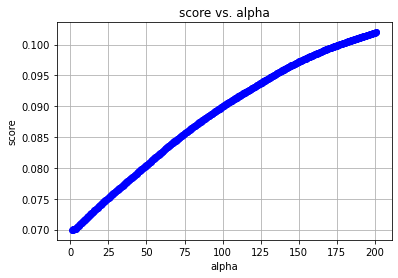

The optimaized alpha and score of Lasso linear is: 


(None, 201.0, 0.1020121025766747)

In [ ]:
alphas = np.linspace (1, 201, num=500)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(lr_train_x, lr_train_y)
    scores[i] = lasso.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
model1_para = opt_a
print ('The optimaized alpha and score of Lasso linear is: '), opt_a, max_score

In [ ]:
lasso = Lasso(alpha = opt_a)
lasso.fit(X_train, y_train)

Lasso(alpha=201.0)

### 3.2.3 Ridge linear regression

Streaming output truncated to the last 5000 lines.

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n

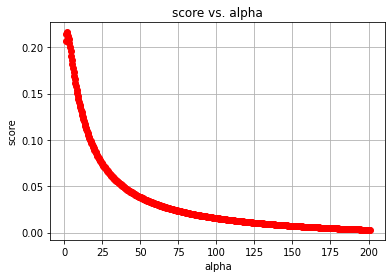

The optimaized alpha and score of Ridge linear is: 


(None, 1.8016032064128256, 0.21610161513179627)

In [ ]:
# Use the same training data

alphas = np.linspace (1, 201, num=500)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = Ridge(normalize=True)
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_x, lr_train_y)
    scores[i] = ridge.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge
plt.plot(alphas, scores, color='r', linestyle='dashed', marker='o',markerfacecolor='r', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
model3_para = opt_a
print ('The optimaized alpha and score of Ridge linear is: '), opt_a, max_score

In [ ]:
ridge = Ridge(alpha = opt_a, normalize=True)
ridge.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 



Lasso(alpha=1.8016032064128256, normalize=True)

### 3.2.4 Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters = {
    "n_estimators":[40,60,80],
    "max_depth":[1,3,5,7,9],
}

Grid_RF = GridSearchCV(RandomForestRegressor(max_features='sqrt', random_state=2),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

best_RF_model = Grid_RF.best_estimator_
print(best_RF_model)

RandomForestRegressor(max_depth=9, max_features='sqrt', n_estimators=80,
                      random_state=2)


### 3.2.5 Boosting Regression

In [ ]:
import xgboost as xgb
parameters = {
     'max_depth': [4],
     'learning_rate': [0.1, 0.5, 1],
     'gamma': [0.25],
     'reg_lambda': [10.0, 20, 100],
      'scale_pos_weight': [3]
 }

## Output: max_depth: 4, learning_rate: 0.1, reg_lambda: 10.

## NOTE: To speed up cross validiation, and to further prevent overfitting.
## We are only using a random subset of the data (90%) and are only
## using a random subset of the features (columns) (50%) per tree.
Grid_XGB = GridSearchCV(
     estimator=xgb.XGBRegressor(objective = 'reg:squarederror',
                                 seed=42,
                                 subsample=0.9,
                                 ),
     param_grid=parameters,
     scoring='neg_root_mean_squared_error', ## see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
     verbose=2, # NOTE: If you want to see what Grid Search is doing, set verbose=2
     cv = 3
 )
    
Grid_XGB.fit(X_train, y_train)

best_XGB_model = Grid_XGB.best_estimator_
print(best_XGB_model)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END gamma=0.25, learning_rate=0.1, max_depth=4, reg_lambda=10.0, scale_pos_weight=3; total time=   0.6s
[CV] END gamma=0.25, learning_rate=0.1, max_depth=4, reg_lambda=10.0, scale_pos_weight=3; total time=   0.5s
[CV] END gamma=0.25, learning_rate=0.1, max_depth=4, reg_lambda=10.0, scale_pos_weight=3; total time=   0.5s
[CV] END gamma=0.25, learning_rate=0.1, max_depth=4, reg_lambda=20, scale_pos_weight=3; total time=   0.5s
[CV] END gamma=0.25, learning_rate=0.1, max_depth=4, reg_lambda=20, scale_pos_weight=3; total time=   0.5s
[CV] END gamma=0.25, learning_rate=0.1, max_depth=4, reg_lambda=20, scale_pos_weight=3; total time=   0.5s
[CV] END gamma=0.25, learning_rate=0.1, max_depth=4, reg_lambda=100, scale_pos_weight=3; total time=   0.5s
[CV] END gamma=0.25, learning_rate=0.1, max_depth=4, reg_lambda=100, scale_pos_weight=3; total time=   0.5s
[CV] END gamma=0.25, learning_rate=0.1, max_depth=4, reg_lambda=100, scale_p

# Part 4: Model Evaluation

In [ ]:
# Lasso
y_pred=lasso.predict(X_test)
lasso_score=lasso.score(X_test,y_test)
MSE_lasso=mean_squared_error(y_test,y_pred)
RMSE_lasso=np.sqrt(MSE_lasso)
print ('lasso score: ', lasso_score)
print ('Mean square error of lasso: ', MSE_lasso)
print ('Root mean squared error of lasso:', RMSE_lasso)

lasso score:  0.18451166386762585
Mean square error of lasso:  172179738.91327336
Root mean squared error of lasso: 13121.727741165541


In [ ]:
# Ridge
y_pred=ridge.predict(X_test)
ridge_score=ridge.score(X_test,y_test)
MSE_ridge=mean_squared_error(y_test,y_pred)
RMSE_ridge=np.sqrt(MSE_ridge)
print ('ridge score: ', ridge_score)
print ('Mean square error of ridge: ', MSE_ridge)
print ('Root mean squared error of ridge:', RMSE_ridge)

ridge score:  0.18581626305223586
Mean square error of ridge:  171904289.79028776
Root mean squared error of ridge: 13111.227623311548


In [ ]:
# RF 
rf = best_RF_model.fit(X_train,y_train)
y_pred=rf.predict(X_test)
rf_score=rf.score(X_test,y_test)
MSE_rf=mean_squared_error(y_test,y_pred)
RMSE_rf=np.sqrt(MSE_rf)
print ('rf score: ', rf_score)
print ('Mean square error of rf: ', MSE_rf)
print ('Root mean squared error of rf:', RMSE_rf)

rf score:  0.524211150362957
Mean square error of rf:  100456617.56105715
Root mean squared error of rf: 10022.804874936814


In [ ]:
# XGB
xgb = best_XGB_model.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
xgb_score=xgb.score(X_test,y_test)
MSE_xgb=mean_squared_error(y_test,y_pred)
RMSE_xgb=np.sqrt(MSE_xgb)
print ('xgb score: ', xgb_score)
print ('Mean square error of xgb: ', MSE_xgb)
print ('Root mean squared error of xgb:', RMSE_xgb) 

xgb score:  0.6108535237135463
Mean square error of xgb:  82163209.10707131
Root mean squared error of xgb: 9064.392373847864


<Figure size 432x288 with 0 Axes>

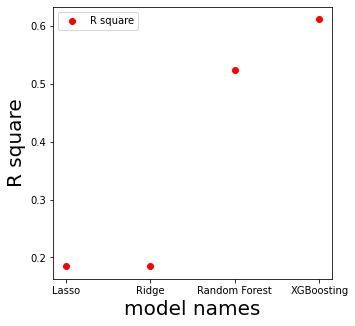

<Figure size 432x288 with 0 Axes>

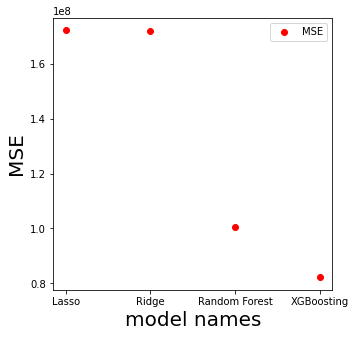

<Figure size 432x288 with 0 Axes>

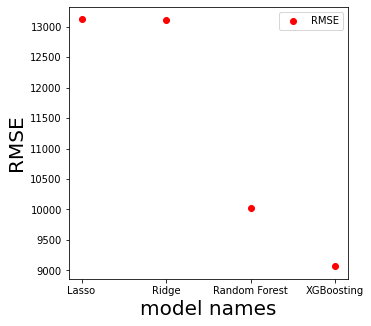

In [ ]:
score_lst = [lasso_score, ridge_score, rf_score, xgb_score]
MSE_lst =  [MSE_lasso, MSE_ridge, MSE_rf, MSE_xgb]
RMSE_lst =  [ RMSE_lasso, RMSE_ridge, RMSE_rf, RMSE_xgb]
model_lst = ['Lasso', 'Ridge', 'Random Forest', 'XGBoosting']



plt.figure(1)
plt.figure(figsize=(5, 5))
plt.plot(model_lst, score_lst, 'ro')
plt.legend(['R square'])
plt.xlabel('model names',fontsize =20)
plt.ylabel('R square', fontsize =20)
plt.show()

plt.figure(2)
plt.figure(figsize=(5, 5))
plt.plot(model_lst, MSE_lst, 'ro')
plt.legend(['MSE'])
plt.xlabel('model names', fontsize =20)
plt.ylabel('MSE', fontsize =20)
plt.show()

plt.figure(3)
plt.figure(figsize=(5, 5))
plt.plot(model_lst, RMSE_lst, 'ro')
plt.legend(['RMSE'])
plt.xlabel('model names', fontsize =20)
plt.ylabel('RMSE', fontsize =20)
plt.show()

## 4.1 Feature importance

In [ ]:
importances = best_XGB_model.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by XGBoost Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 2)))

Feature importance ranking by XGBoost Model:
import_id_lionsgate : 0.11999999731779099
weighted_categorical_position : 0.10999999940395355
import_id_mgm : 0.07999999821186066
imdb_votes : 0.07999999821186066
import_id_other : 0.05999999865889549
boxoffice : 0.05999999865889549
duration_in_mins : 0.05000000074505806
2001-2006 : 0.05000000074505806
weighted_horizontal_poition : 0.05000000074505806
1974-1991 : 0.03999999910593033
1991-2001 : 0.03999999910593033
awards_other award : 0.029999999329447746
awards_Oscar : 0.029999999329447746
Horror : 0.029999999329447746
imdb_rating : 0.029999999329447746
awards_no award : 0.019999999552965164
mpaa_NotRated : 0.019999999552965164
budget : 0.019999999552965164
metacritic_score : 0.009999999776482582
Fantasy : 0.009999999776482582
1916-1974 : 0.009999999776482582
star_category : 0.009999999776482582
import_id_paramount : 0.009999999776482582
2014-2017 : 0.009999999776482582
Kids & Family : 0.009999999776482582
awards_Golden Globe : 0.0099999997

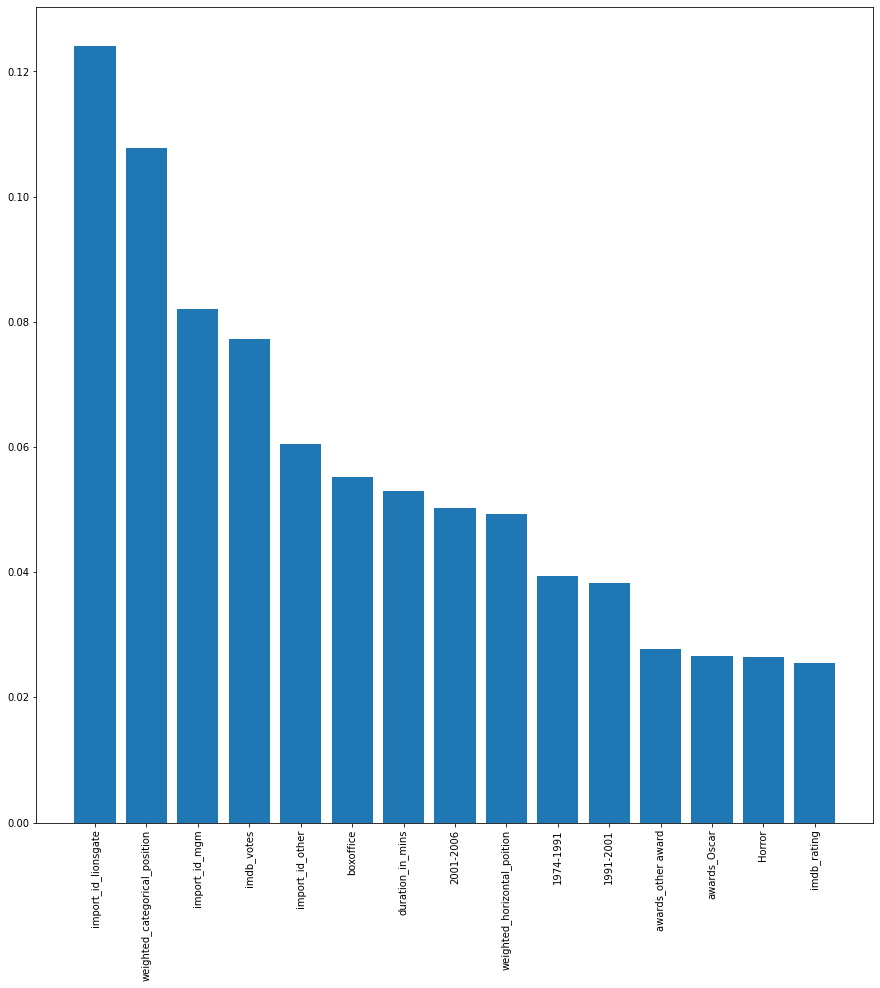

In [ ]:
feature_name = X_train.columns.values
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(15, 15))
plt.bar(feature_name[indices[:15]], importances[indices[:15]])
plt.xticks(rotation=90)
plt.show()